# Cellular Automaton - kollaboratives Coding in R

packages required: none

authors: Pit Rieger, Paul Peters & Tristan Kahl  
supplements: Timo Varelmann

date: 04.12.2018

## Vorbereitungen

### Bestimme die Dimensionen der Matrix

- Anzahl der Zeilen über `nrow()`
- Anzahl der Spalten über `ncol()`

In [146]:
row.numb <- 500
col.numb <- 500

### Erstelle die Matrix

In [147]:
a <- matrix(0, nrow=row.numb, ncol=col.numb)

### Bestimme die erste Zeile
Bestimme, ob die 1 (repräsentiert schwarze Zelle) in der ersten Zeile mittig, links oder rechts positioniert werden soll.
Darüber hinaus ist hier auch eine random-Möglichkeit geschaffen.

Es wird eine Funktion erstellt mit zwei Argumenten `a` für die Matrix und `position` für die Zeichenketten "links", "mitte", "rechts" und "random".

In [148]:
black.cell.setter <- function (a,position) {
    if (position == "rechts") {
        a[1,2] <- 1
        return(a)
    }
    else if (position == "mitte") {
        if ((ncol(a) %% 2) == 1) {
            a[1, (ncol(a)/2 + 0.5)] <- 1
            return(a)
        }
        else if ((ncol(a) %% 2) == 0) {
            a[1, (ncol(a)/2)] <- 1
            return(a)
        }
    }
    else if (position == "links") {
        a[1,(ncol(a)-1)] <- 1
        return(a)
    }
    else if (position == "random") {
        a[1,] <- sample(0:1, ncol(a), replace=T, prob=c(0.5,0.5))
        return(a)
    }
}

In [149]:
a <- black.cell.setter(a,"mitte")

### Rulesetter

Über die zu definierende Funktion `rulesetter()` wird die Regel (als ganze Zahl zwischen 0 und 255) angegeben für die Berechnungen des zellulären Automaten angegeben. Sie entspricht dem achtstelligen Wolfram Code für den Zellulären Automaten.

Funktion `intToBits()` transformiert eine ganze Zahl zu Bits, z.B. die Zahl drei wird transformiert zu

In [150]:
intToBits(3)

 [1] 01 01 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
[26] 00 00 00 00 00 00 00

Um diesen Output als achtstelligen binär-Code für die Zahl 3 - 00000011 - anzugeben:
- werden die ersten acht Elemente genommen: `intToBits(3)[1:8]`
- in der Reihenfolge umgekehrt über `rev()`
- und als ganze Zahl repräsentiert über `as.integer`

In [151]:
rulesetter <- function (x){                # erstellt Funktion rulesetter() für ein Argument x
    as.integer(rev(intToBits(x)[1:8]))     
}

Gebe als Argument die Regelnummer zwischen 0 und 255 ein:

In [152]:
rule.number <- 30                   # Die Zahl wird in der Graphik angegeben, daher dieser Zwischenschritt
rule <- rulesetter(rule.number)

## Berechnung des zellulären Automaten

Angegeben ist Euer Code einschließlich Eurer Kommentare. Letztendlich hattet Ihr die "verschachtelte Alternative" gewählt und die erste Strategie auskommentiert:

In [153]:
for (i in 2:nrow(a)) { 
    # Zeile i / row i
    for (j in 2:(ncol(a)-1)) { #Klammern wichtig!!!!
        # Regel für o.l. schwarz, o.m. schwarz und o.r. schwarz
        #if (a[(i-1),(j-1)]==1 & a[(i-1), j]==1 & a[(i-1), (j+1)]==1){
        #    a[i,j] <- rule[1]
        #} else if (a[(i-1),(j-1)]==1 & a[(i-1), j]==1 & a[(i-1), (j+1)]==0){
        #    a[i,j] <- rule[2]
        #} else if (a[(i-1),(j-1)]==1 & a[(i-1), j]==0 & a[(i-1), (j+1)]==1) {
        #    a[i,j] <- rule[3]
        #}
        # alternativ verschachtelt:
        if(a[(i-1),(j-1)]==1) { #betrachte oben links
            # oben links schwarz
            if(a[(i-1), j]==1) {
                # oben mitte schwarz
                if(a[(i-1), (j+1)]==1) {
                    # oben rechts schwarz
                    a[i,j] <- rule[1]
                } else {
                    a[i,j] <- rule[2]
                }
            } else {
                if(a[(i-1), (j+1)]==1) {
                    # oben rechts schwarz
                    a[i,j] <- rule[3]
                } else {
                    a[i,j] <- rule[4]
                }
            }
        } else {
            if(a[(i-1), j]==1) {
                # oben mitte schwarz
                if(a[(i-1), (j+1)]==1) {
                    # oben rechts schwarz
                    a[i,j] <- rule[5]
                } else {
                    a[i,j] <- rule[6]
                }
            } else {
                if(a[(i-1), (j+1)]==1) {
                    # oben rechts schwarz
                    a[i,j] <- rule[7]
                } else {
                    a[i,j] <- rule[8]
                }
            }
        }
 } #end for j
} #end for i

### Graphische Darstellung
Zur graphischen Darstellung der Berechnungen nutzt folgende Zusammenfassung (auf Englisch):

In [ ]:
image(t(apply(a, 2, rev)), yaxt='n',xaxt='n', col=c("white","black"),
      main=paste("rule number: ",rule.number))

The matrix a (consisting of binary code) will now be printed.

This is achieved by the function `image()`. The argument-settings will do the following:
- yaxt and xaxt specify y and x axis-types. 'n' just means: don't plot any axis.
- col=c("white","black") specifies that 0 will be colored white, a 1 is colored black. Try other colors if you like to
- The main-argument plots the title that shows the rule-number. 'paste' will take the character string "rule number: " and the variable rule.number (specified in the rule setting), and creates one character string which is the main-title.

In this code, the matrix is transformed in order to plot correctly.

But what does it mean: `t(apply(a, 2, rev))` ?  
Try the following to understand:

First, just image the matrix a. You will recognise that the pattern evolves from left to right, not from the upside to the bottom.

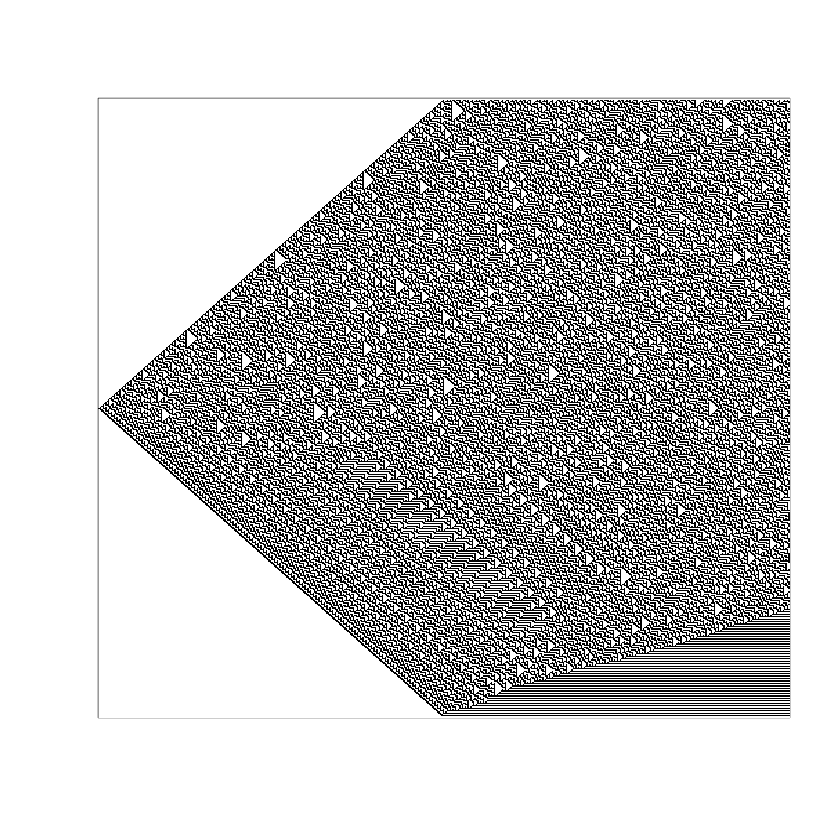

In [156]:
image(a, yaxt='n',xaxt='n', col=c("white","black"))

So, in order to create a plot that looks similar to the structure of the original matrix a, you need to do some adjustments.

As a first adjustment, transform the matrix using function `t()`. This will now plot the pattern from bottom to the upside.

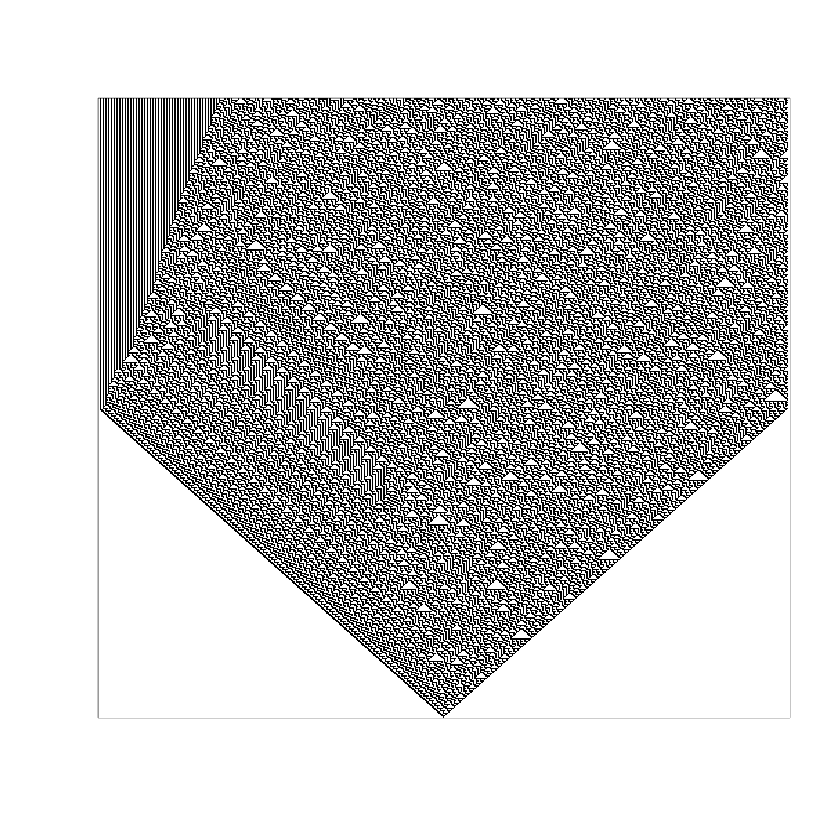

In [157]:
image(t(a), yaxt='n',xaxt='n', col=c("white","black"))

What you find the the final code is that the positions of the elements in the columns of the matrix have been reversed. That means, the first element of a column will become the last element, and so forth.

`apply(a, 2, rev)` means: apply function rev() to all columns (number 2 refers to columns) of the matrix a.

As a result, the pattern now evolves from upside to the bottom, similar to the original matrix.